# Experiment 2: 
***

## Importing Libraries

In [69]:
import numpy as np
import random
import sklearn.datasets
import math
from numpy import dot
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Parameters

In [106]:
learning_rate = 0.5
max_error = 0.01
iteration = 2000

## Load Dataset

In [8]:
dataset = sklearn.datasets.load_breast_cancer()
type(dataset)

sklearn.utils.Bunch

In [11]:
data = sklearn.datasets.load_breast_cancer(as_frame=True).data
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [116]:
x = dataset.data
y = dataset.target

In [15]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [20]:
print("Shape of Features: ", x.shape)
print("Shape of Target: ", y.shape)

Shape of Features:  (569, 30)
Shape of Target:  (569,)


## Data Scaling

In [21]:
scaler = MinMaxScaler()

In [55]:
#x = scaler.fit_transform(x)
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

## Initial Weights

In [56]:
def random_weight(n):
    w = np.random.random((1 , n))
    return w

## Sigmoid Function

In [57]:
def sigmoid(x):
    
    f_x = 2.0 / (1.0 + math.exp(-x)) - 1.0
    return f_x

## Tanh Function

## RELU Function

## Step Function

## Output

In [58]:
def getoutput(a , w):
    return sigmoid(dot(w , a))

## Training Model

In [118]:
#initial counter and error
E = 0
k = 1
mse = 0
random.seed(1)
#initial random weights
n = x.shape[1]
w = random_weight(n)
print(w.shape)
MSE_list = []
while(k < iteration):
    for i in range(569):
        o = getoutput(x[i], w)
        w = w + 1/2 * learning_rate * (y[i] - o)*(1 - o ** 2) * x[i]
        #print("i ", i , "w", w.shape)
        #print("x", x[i])
        E = E + 1/2 * (y[i] - o) ** 2
        mse = mse + (y[i] - o) ** 2
        #print("E", E)
        #print("step: ",i , "output", o)
    print("K: ", k, " E: ", E)
    MSE_list.append(mse / 569)
    if(E < max_error):
        break
    k += 1
    E = 0
    mse = 0
        

(1, 30)
K:  1  E:  106.0
K:  2  E:  106.0
K:  3  E:  106.0
K:  4  E:  106.0
K:  5  E:  106.0
K:  6  E:  106.0
K:  7  E:  106.0
K:  8  E:  106.0
K:  9  E:  106.0
K:  10  E:  106.0
K:  11  E:  106.0
K:  12  E:  106.0
K:  13  E:  106.0
K:  14  E:  106.0
K:  15  E:  106.0
K:  16  E:  106.0
K:  17  E:  106.0
K:  18  E:  106.0
K:  19  E:  106.0
K:  20  E:  106.0
K:  21  E:  106.0
K:  22  E:  106.0
K:  23  E:  106.0
K:  24  E:  106.0
K:  25  E:  106.0
K:  26  E:  106.0
K:  27  E:  106.0
K:  28  E:  106.0
K:  29  E:  106.0
K:  30  E:  106.0
K:  31  E:  106.0
K:  32  E:  106.0
K:  33  E:  106.0
K:  34  E:  106.0
K:  35  E:  106.0
K:  36  E:  106.0
K:  37  E:  106.0
K:  38  E:  106.0
K:  39  E:  106.0
K:  40  E:  106.0
K:  41  E:  106.0
K:  42  E:  106.0
K:  43  E:  106.0
K:  44  E:  106.0
K:  45  E:  106.0
K:  46  E:  106.0
K:  47  E:  106.0
K:  48  E:  106.0
K:  49  E:  106.0
K:  50  E:  106.0
K:  51  E:  106.0
K:  52  E:  106.0
K:  53  E:  106.0
K:  54  E:  106.0
K:  55  E:  106.0
K:  56  E: 

K:  444  E:  106.0
K:  445  E:  106.0
K:  446  E:  106.0
K:  447  E:  106.0
K:  448  E:  106.0
K:  449  E:  106.0
K:  450  E:  106.0
K:  451  E:  106.0
K:  452  E:  106.0
K:  453  E:  106.0
K:  454  E:  106.0
K:  455  E:  106.0
K:  456  E:  106.0
K:  457  E:  106.0
K:  458  E:  106.0
K:  459  E:  106.0
K:  460  E:  106.0
K:  461  E:  106.0
K:  462  E:  106.0
K:  463  E:  106.0
K:  464  E:  106.0
K:  465  E:  106.0
K:  466  E:  106.0
K:  467  E:  106.0
K:  468  E:  106.0
K:  469  E:  106.0
K:  470  E:  106.0
K:  471  E:  106.0
K:  472  E:  106.0
K:  473  E:  106.0
K:  474  E:  106.0
K:  475  E:  106.0
K:  476  E:  106.0
K:  477  E:  106.0
K:  478  E:  106.0
K:  479  E:  106.0
K:  480  E:  106.0
K:  481  E:  106.0
K:  482  E:  106.0
K:  483  E:  106.0
K:  484  E:  106.0
K:  485  E:  106.0
K:  486  E:  106.0
K:  487  E:  106.0
K:  488  E:  106.0
K:  489  E:  106.0
K:  490  E:  106.0
K:  491  E:  106.0
K:  492  E:  106.0
K:  493  E:  106.0
K:  494  E:  106.0
K:  495  E:  106.0
K:  496  E: 

K:  878  E:  106.0
K:  879  E:  106.0
K:  880  E:  106.0
K:  881  E:  106.0
K:  882  E:  106.0
K:  883  E:  106.0
K:  884  E:  106.0
K:  885  E:  106.0
K:  886  E:  106.0
K:  887  E:  106.0
K:  888  E:  106.0
K:  889  E:  106.0
K:  890  E:  106.0
K:  891  E:  106.0
K:  892  E:  106.0
K:  893  E:  106.0
K:  894  E:  106.0
K:  895  E:  106.0
K:  896  E:  106.0
K:  897  E:  106.0
K:  898  E:  106.0
K:  899  E:  106.0
K:  900  E:  106.0
K:  901  E:  106.0
K:  902  E:  106.0
K:  903  E:  106.0
K:  904  E:  106.0
K:  905  E:  106.0
K:  906  E:  106.0
K:  907  E:  106.0
K:  908  E:  106.0
K:  909  E:  106.0
K:  910  E:  106.0
K:  911  E:  106.0
K:  912  E:  106.0
K:  913  E:  106.0
K:  914  E:  106.0
K:  915  E:  106.0
K:  916  E:  106.0
K:  917  E:  106.0
K:  918  E:  106.0
K:  919  E:  106.0
K:  920  E:  106.0
K:  921  E:  106.0
K:  922  E:  106.0
K:  923  E:  106.0
K:  924  E:  106.0
K:  925  E:  106.0
K:  926  E:  106.0
K:  927  E:  106.0
K:  928  E:  106.0
K:  929  E:  106.0
K:  930  E: 

K:  1299  E:  106.0
K:  1300  E:  106.0
K:  1301  E:  106.0
K:  1302  E:  106.0
K:  1303  E:  106.0
K:  1304  E:  106.0
K:  1305  E:  106.0
K:  1306  E:  106.0
K:  1307  E:  106.0
K:  1308  E:  106.0
K:  1309  E:  106.0
K:  1310  E:  106.0
K:  1311  E:  106.0
K:  1312  E:  106.0
K:  1313  E:  106.0
K:  1314  E:  106.0
K:  1315  E:  106.0
K:  1316  E:  106.0
K:  1317  E:  106.0
K:  1318  E:  106.0
K:  1319  E:  106.0
K:  1320  E:  106.0
K:  1321  E:  106.0
K:  1322  E:  106.0
K:  1323  E:  106.0
K:  1324  E:  106.0
K:  1325  E:  106.0
K:  1326  E:  106.0
K:  1327  E:  106.0
K:  1328  E:  106.0
K:  1329  E:  106.0
K:  1330  E:  106.0
K:  1331  E:  106.0
K:  1332  E:  106.0
K:  1333  E:  106.0
K:  1334  E:  106.0
K:  1335  E:  106.0
K:  1336  E:  106.0
K:  1337  E:  106.0
K:  1338  E:  106.0
K:  1339  E:  106.0
K:  1340  E:  106.0
K:  1341  E:  106.0
K:  1342  E:  106.0
K:  1343  E:  106.0
K:  1344  E:  106.0
K:  1345  E:  106.0
K:  1346  E:  106.0
K:  1347  E:  106.0
K:  1348  E:  106.0


K:  1709  E:  106.0
K:  1710  E:  106.0
K:  1711  E:  106.0
K:  1712  E:  106.0
K:  1713  E:  106.0
K:  1714  E:  106.0
K:  1715  E:  106.0
K:  1716  E:  106.0
K:  1717  E:  106.0
K:  1718  E:  106.0
K:  1719  E:  106.0
K:  1720  E:  106.0
K:  1721  E:  106.0
K:  1722  E:  106.0
K:  1723  E:  106.0
K:  1724  E:  106.0
K:  1725  E:  106.0
K:  1726  E:  106.0
K:  1727  E:  106.0
K:  1728  E:  106.0
K:  1729  E:  106.0
K:  1730  E:  106.0
K:  1731  E:  106.0
K:  1732  E:  106.0
K:  1733  E:  106.0
K:  1734  E:  106.0
K:  1735  E:  106.0
K:  1736  E:  106.0
K:  1737  E:  106.0
K:  1738  E:  106.0
K:  1739  E:  106.0
K:  1740  E:  106.0
K:  1741  E:  106.0
K:  1742  E:  106.0
K:  1743  E:  106.0
K:  1744  E:  106.0
K:  1745  E:  106.0
K:  1746  E:  106.0
K:  1747  E:  106.0
K:  1748  E:  106.0
K:  1749  E:  106.0
K:  1750  E:  106.0
K:  1751  E:  106.0
K:  1752  E:  106.0
K:  1753  E:  106.0
K:  1754  E:  106.0
K:  1755  E:  106.0
K:  1756  E:  106.0
K:  1757  E:  106.0
K:  1758  E:  106.0


ValueError: x and y must have same first dimension, but have shapes (979,) and (1979,)

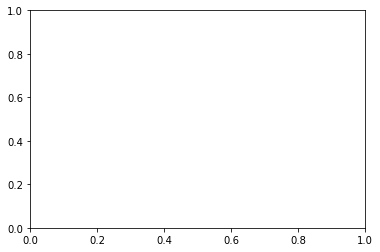

In [119]:
plt.plot(list(range(21,1000)) , MSE_list[20:], '-r')

In [81]:
plt.plot?

In [115]:
int(-1 >= 0)

0